In [14]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from pyod.utils.data import generate_data
from pyod.models.knn import KNN
from sklearn.metrics import (
    confusion_matrix,
    balanced_accuracy_score,
    roc_curve,
    auc
)

# Ex 1

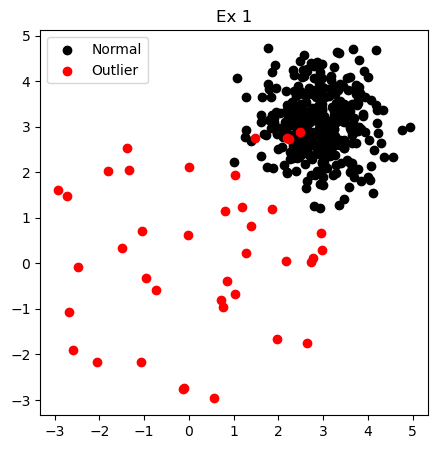

In [15]:
X_train, X_test, y_train, y_test = generate_data(
    n_train=400,         
    n_test=100,           
    n_features=2,        
    contamination=0.1,
    random_state=23
)

plt.figure(figsize=(5, 5))
plt.scatter(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    c='black',
    label='Normal'
)
plt.scatter(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    c='red',
    label='Outlier'
)

plt.title("Ex 1")
plt.legend()
plt.show()

# Ex 2

Train set
TN=357, FP=3, FN=8, TP=32
Balanced Accuracy: 0.8958
Confusion Matrix:
 [[357   3]
 [  8  32]]

Test set
TN=89, FP=1, FN=0, TP=10
Balanced Accuracy: 0.9944
Confusion Matrix:
 [[89  1]
 [ 0 10]]


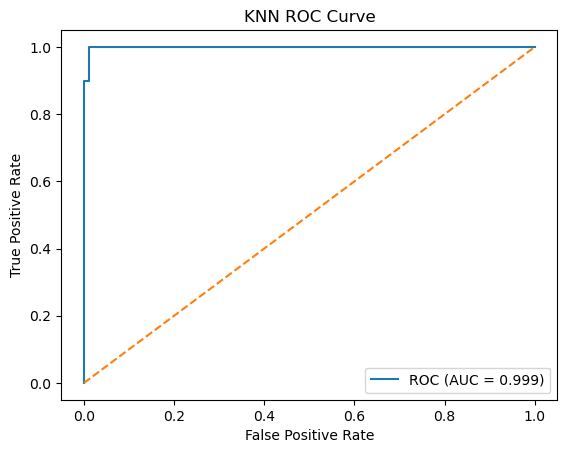

In [16]:
knn_model = KNN(contamination=0.1)
knn_model.fit(X_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

def cm_stats(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    TN, FP, FN, TP = cm.ravel()
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    return TN, FP, FN, TP, bal_acc, cm

TN, FP, FN, TP, bal_acc_train, cm_train = cm_stats(y_train, y_train_pred)
TNt, FPt, FNt, TPt, bal_acc_test, cm_test = cm_stats(y_test, y_test_pred)

print("Train set")
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")
print(f"Balanced Accuracy: {bal_acc_train:.4f}")
print("Confusion Matrix:\n", cm_train)

print("\nTest set")
print(f"TN={TNt}, FP={FPt}, FN={FNt}, TP={TPt}")
print(f"Balanced Accuracy: {bal_acc_test:.4f}")
print("Confusion Matrix:\n", cm_test)

y_test_scores = knn_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend()
plt.show()


In [17]:
# Change the contamination rate used by the model and see how the reported metrics change
for cont in [0.01, 0.05, 0.2, 0.3, 0.5]:
    knn_model = KNN(contamination=cont)
    knn_model.fit(X_train)
    y_test_pred = knn_model.predict(X_test)
    TN, FP, FN, TP, bal_acc_test, cm_test = cm_stats(y_test, y_test_pred)
    print(f"Contamination: {cont:.2f} - Balanced Accuracy: {bal_acc_test:.4f}")
    print("Confusion Matrix:\n", cm_test)
    print()

Contamination: 0.01 - Balanced Accuracy: 0.5500
Confusion Matrix:
 [[90  0]
 [ 9  1]]

Contamination: 0.05 - Balanced Accuracy: 0.7500
Confusion Matrix:
 [[90  0]
 [ 5  5]]

Contamination: 0.20 - Balanced Accuracy: 0.9389
Confusion Matrix:
 [[79 11]
 [ 0 10]]

Contamination: 0.30 - Balanced Accuracy: 0.8889
Confusion Matrix:
 [[70 20]
 [ 0 10]]

Contamination: 0.50 - Balanced Accuracy: 0.7833
Confusion Matrix:
 [[51 39]
 [ 0 10]]



# Ex 3

In [18]:
X_train, _, y_train, _ = generate_data(
    n_train=1000,         
    n_test=0,           
    n_features=1,        
    contamination=0.1,
    random_state=23
)

print(X_train.shape, y_train.shape)
print(X_train[:5], y_train[:5])

mu = np.mean(X_train)
sigma = np.std(X_train)
z_abs = np.abs((X_train - mu) / sigma)

print()
print("Mean:", mu)
print("Standard Deviation:", sigma)
print()

threshold = np.quantile(z_abs, 0.9)
print("Threshold:", threshold)

y_pred = (z_abs >= threshold).astype(int)

cm = confusion_matrix(y_train, y_pred, labels=[0, 1])
TN, FP, FN, TP = cm.ravel()
bal_acc = balanced_accuracy_score(y_train, y_pred)
print(f"\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print("Confusion Matrix:\n", cm)

(1000, 1) (1000,)
[[3.36640088]
 [2.59024178]
 [1.9293989 ]
 [4.36222095]
 [3.38099778]] [0. 0. 0. 0. 0.]

Mean: 2.7022134833822324
Standard Deviation: 1.2100133671323587

Threshold: 1.273426419322169

TN=868, FP=32, FN=32, TP=68
Balanced Accuracy: 0.8222
Confusion Matrix:
 [[868  32]
 [ 32  68]]


# Ex 4

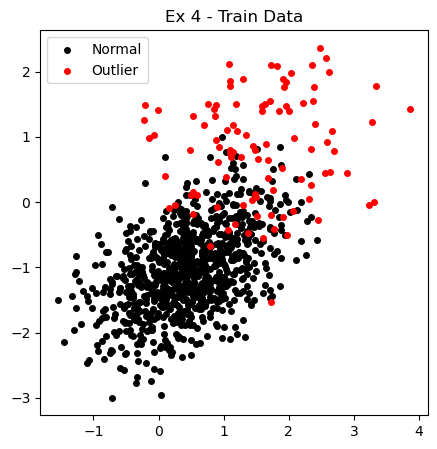

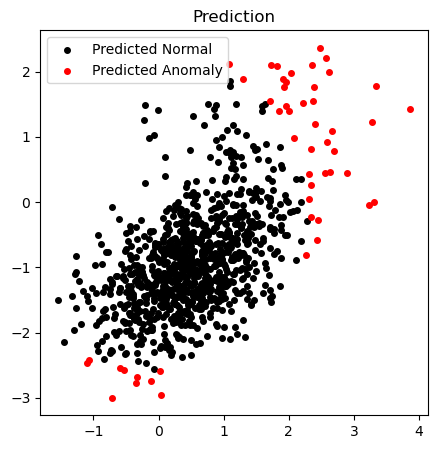


TN=886, FP=14, FN=64, TP=36
Balanced Accuracy: 0.6722
Confusion Matrix:
 [[886  14]
 [ 64  36]]


In [19]:
rng = np.random.RandomState(23)
n_train = 1000
cont     = 0.05
n_norm   = 900
n_out    = 100

mu_norm = np.array([0.5, -1.0])
Sigma_norm = np.array([
    [0.5, 0.2],
    [0.2, 0.4],
])
L_norm = np.linalg.cholesky(Sigma_norm)  

mu_out  = np.array([1.5, 0.8])
Sigma_out = np.array([
    [0.7, 0.1],
    [0.1, 0.5],
])
L_out = np.linalg.cholesky(Sigma_out)

X_norm_std = rng.normal(size=(n_norm, 2))
X_out_std  = rng.normal(size=(n_out,  2))

Y_norm = X_norm_std @ L_norm.T + mu_norm
Y_out  = X_out_std  @ L_out.T  + mu_out

X_train = np.vstack([Y_norm, Y_out])
y_train = np.hstack([np.zeros(n_norm, dtype=int), np.ones(n_out, dtype=int)])

plt.figure(figsize=(5, 5))
plt.scatter(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    s=16,
    c='black',
    label='Normal'
)
plt.scatter(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    s=16,
    c='red',
    label='Outlier'
)
plt.title("Ex 4 - Train Data")
plt.legend()
plt.show()

mu = np.mean(X_train)
sigma = np.std(X_train)        
Z = (X_train - mu) / sigma                   
scores = np.linalg.norm(Z, axis=1)

threshold = np.quantile(scores, 1 - cont)
y_pred = (scores >= threshold).astype(int)

cm = confusion_matrix(y_train, y_pred, labels=[0, 1])
TN, FP, FN, TP = cm.ravel()
bacc = balanced_accuracy_score(y_train, y_pred)

plt.figure(figsize=(5, 5))
plt.scatter(X_train[y_pred == 0, 0], X_train[y_pred == 0, 1], s=16, c='black', label='Predicted Normal')
plt.scatter(X_train[y_pred == 1, 0], X_train[y_pred == 1, 1], s=16, c='red',  label='Predicted Anomaly')
plt.title("Prediction")
plt.legend()
plt.show()

print(f"\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")
print(f"Balanced Accuracy: {bacc:.4f}")
print("Confusion Matrix:\n", cm)
